# **Image Classification with Reinforcement Learning**
Daiwei Shen, Xinhan Yan

## Introduction

In this project we study a novel image classification technique combining Convolutional Neural Networks and Reinforcement Learning. This technique was proposed by Hafiz in [*Image Classification by Reinforcement Learning with Two-State Q-Learning*](https://arxiv.org/ftp/arxiv/papers/2007/2007.01298.pdf).

Specifically, the technique involves defining two states based upon metrics M and M1, defined as the standard deviations of two predicted feature maps each taking a different action. The action space is defined by various image transformations, including rotations and translations. The reward is then calculated in the following way:

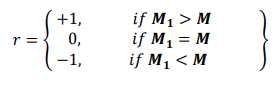

The Q-learning update rule is then applied following an exploring policy and a matrix Q(s, a) is updated throughout training. After training has completed, the Q matrix is used to determine the optimal policy.

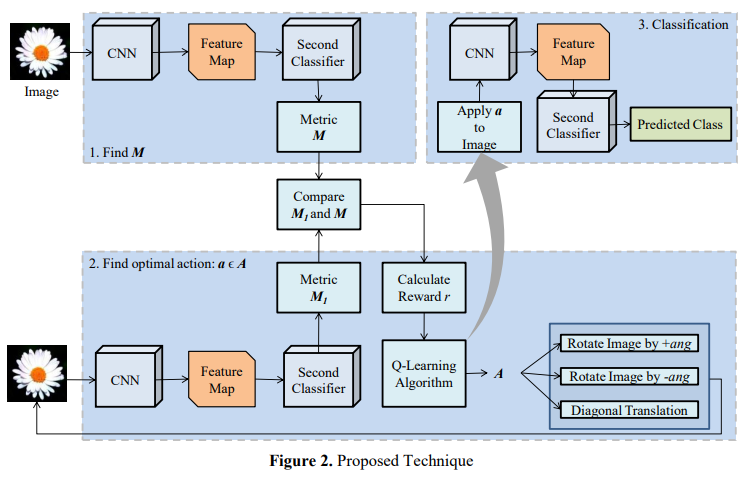

The author claims that the proposed technique leads to higher computational efficiency because it reduces the need for extensive CNN-training. They also claim that the approach results in higher predictive accuracy across the board when compared to non-RL models. Here, we put these claims and the author's overall imeplentation to the test in multiple ways, which is further discussed in the sections below. Our results indicate that while the approach shows signs of promise, its practical benefits are not as clear cut, and much future work remmains to be done.

*Refer to the Appendix section at the bottom for our code and video presentation.

## Challenges

In carrying out this project we faced multiple challenges. One major issue was that we could not find the code files used by the author. As a result, we had to write much of the code on our own. Still, some amount of code was sourced from the internet. This combination resulted in multiple compatibility issues and bugs, which took a long time to solve. We also found that these files were often hard coded for domain-specific projects, so we ended up having to modify much of it anyway.

Another obstacle we faced was that training on large datasets required multiple hours and ended up being extremely time consuming. Due to compatibility issues and complications with package installations, we were unable to set up the environment for GPU usage, which meant all training had to be done using a CPU. These limitations meant we had to truncate our training datasets to some extent and run the models for fewer epochs in the interest of time. In addition, we could not extensively test every RL algorithm using every combination of dataset and architecture because some of them took an extremely long time to run. This was especially true when we first began working on the project. Later on, we managed to optimize the performance and reduce the run time.

Finding suitable datasets was another challenge. Our goal was to conduct testing using datasets that have direct real world applications (as opposed to toy datasets) in domains like robotics and autonomous devices in order to investigate the potential impact of the technique in question. However, these datasets were difficult to find, especially in properly labeled condition.

The final challenge we met was the deadline imposed on the project. In addition to the time limitations caused by the training difficulties discussed earlier, we found that overall we did not have enough time to fully investigate certain subleties and details in the topic. Some questions revolving the studied problem can take multiple months to investigate. This will be further discussed in the Future Work section.

## Project Scope



Owing to the challenges mentioned above as well as other unforseen factors, we have made some small adjustments to our original methodology and goals stated in our [project proposal](https://docs.google.com/document/d/1aJaTqAqZtCDXyFn-miphS9BQby3UJFHlBf-tDuAcLMw/edit?usp=sharing). They are the following:


*   Rather than implement PPO and TD, we decided to instead implement Monte Carlo. We found TD to be somewhat impractical and redundant for the problem as it's very similar to Q learning, except the update rule only takes into account the value of the states. As for PPO, under the time limitations of the project, we found that focusing on investigating the other algorithms was a better use of our time.
*   Instead of using the Oxford Flowers and ImageNet datasets, we decided to use a different flower dataset with fewer classes to reduce training time, and drop ImageNet entirely. The reason for this decision is that the CNNs we used already have ImageNet weights, so using this dataset might lead to biased results.
* The final change to our project goals is the removal of unsupervised learning testing. After further investigation into the RL technique in question, we believe that it will not play any role in improving unsupervised learning performance and as such, investigating this area would have been a poor use of our time.

With these changes in mind, our project involved using multiple datasets covering different domains. The motivation behind the data used is to study the applicability of the Two-State technique to a wide range of data outside that used in the paper. We trained these datasets on Residual Net or ResNet, a state of the art CNN; for one of the datasets, a different architecture called NASNetMobile was used in order to verify the technique's results on a CNN not used in the paper. These were trained along with 3 RL algorithms: Monte Carlo, Q-learning, and Deep Q Network. In addition, Various performance data was collected on each algorithm. Using this data we were able to compare each algorithm and gain new insight into both the technique in question and the different RL algorithms.

## Datasets


4 datasets were used in our testing: CIFAR-10, Flowers Recognition, Remote Sensing, and Pedestrian Detection.

*   [CIFAR-10](https://www.kaggle.com/datasets/swaroopkml/cifar10-pngs-in-folders): 10 classes of miscellaneous objects with 5000 images per class
*   [Flowers Recognition](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition): 5 classes of flower types with 800 images per class
* [Remote Sensing](https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification): 5 classes of aerial images with 40,000 images per class
* [Pedestrian Detection](https://www.kaggle.com/datasets/tejasvdante/pedestrian-no-pedestrian): 2 classes of pedestrian/no-pedestrian images with 630 images per class

## Convolutional Neural Networks Setup

As previously discussed, due to limitations of computational power, we conducted training on truncated versions of all datasets. For CIFAR-10 and flowers recognition datasets, training was conducted using 200 images per class. For the pedestrian and remote sensing datasets, we used 500 images per class. As a side note, the actual size of the training data ended up being twice as large because we had added an image augmentation algorithm to solve an overfitting problem, generating transformed copies of the same images.
 
 In addition, a batch size of 16 was used for all datasets. For all datasets the images were downsized* to 75x75 (*oddly, this improved performance slightly for CIFAR-10, even though the images are only 32x32 in original size). All datasets were trained for between 7-12 epochs.

All datasets were trained on ResNet, which used a learning rate of .00001. Training performed on NASNetMobile used a learning rate of .00005 and only included the Remote Sensing dataset. All models were implemented using Python/Tensorflow and trained using an i7 8700 CPU.

## Reinforcement Learning

**Q-Learning**

The implementation of the Q-learning algorithm follows the standard Q update rule:
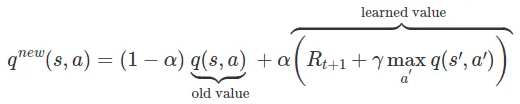

However, a random policy with an equal distribution over the action space is used with no epsilon decay. This policy ensures that all state-action pairs are visited. Following this policy, the algorithm updates a Q table populated with state-action values. This update happens iteratively for a number (60) of times that is a function of the number of actions in the action space. After training is finished, this table is stored and indexed to determine the optimal action for a given image.

The algorithm is used with gamma = .4 and alpha = .3. There are 3 possible actions consisting of 90 degree rotation, 180 degree rotation, and diagonal translation. The action space is kept constant for all 3 algorithms used.

**Monte Carlo**

Our implementation of Monte Carlo follows closely the MC Exploring Starts algorithm shown by [Sutton & Barto](https://www.andrew.cmu.edu/course/10-703/textbook/BartoSutton.pdf) with small changes:

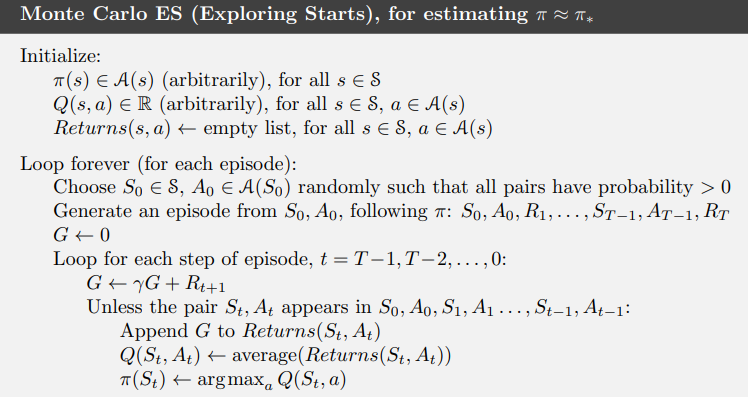

Specifically, the task at hand does not have clearly defined episodes or steps. To address this issue we decided to abstractly define episodes = 30 and steps = 10 for the task. Furthermore, instead of just choosing a random action at the start of an episode, our implementation follows a random policy at every step of each episode. This may seem counterintuitive at first, but we found that there is no point in following (for example) a greedy policy because the MC algorithm only updates the Q table for state-action pairs it has not seen during each episode. In our case, because we have so few states and they only transition to each other, an "optimal" policy would choose only 1 or 2 state-action pairs most of the time, which prevents it from collecting data for other combinations.

Again, gamma = .4 and alpha = .3. 

**Deep Q Network**

Our DQN implementation is similar to that used for [Homework 6](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html); in fact, we used some of the code from that assignment and modified it for this project.

As usual, we store observed transitions and rewards into a buffer. We then sample from this buffer and execute the Q update rule following Bellman's optimality equation. These values are used as target values for model fitting, where the state representation is the feature. In this case, we have represented the states simply as integers. After training is finished, the model is run for all states of the state space, and a Q table is updated. As before, this table is used for determining the optimal action.

For this algorithm, we used gamma = .45, epsilon-greedy policy with decay = .999, episodes = 3, steps = 16, batch size = 16.

## Results


Below we visualize the results for all the datasets. Note that in the interest of time, not all combinations of RL algorithm-dataset were tested. As can be seen below, some of these algorithms can take extremely long to run, and as such it would have been impractical to run them on every dataset.

Note1: all datasets were trained using the ResNet CNN. The remote sensing dataset was additionally trained on NASNetMobile.

Note2: If the reader notices something odd about the plots, we have an explanation. Some of the plots use truncated data because the original images were lost and they were later regenerated on a different session. For this reason, some of the misclassification bar graphs and confusion matrices may appear to be scaled differently across the same dataset. However, not every plot necessarily reflects the data of the tables exactly. The values for each algorithm shown in the tables are consistent and calculated on the same training runs, while this is not necessarily true for all the visualizations. The reason for this small oversight is because redoing all of the plots would take a long time while not adding more value to the results. That being said, we included them because they help illustrate the point nonetheless.

Note3: All training times are measured in seconds.

#### Flower Dataset Results


|  | No RL | Q-Learning | Monte Carlo | DQN |
| --- | --- | --- | --- | --- |
| **Accuracy** | .8325 | .8725 | .865 | .865 |
| **Precision** | .84 | .88 | .87 | .87 |
| **Recall** | .83 | .87 | .86 | .87 |
| **Training Time** | 257 | 731 | 4198 | 797 |

No RL:
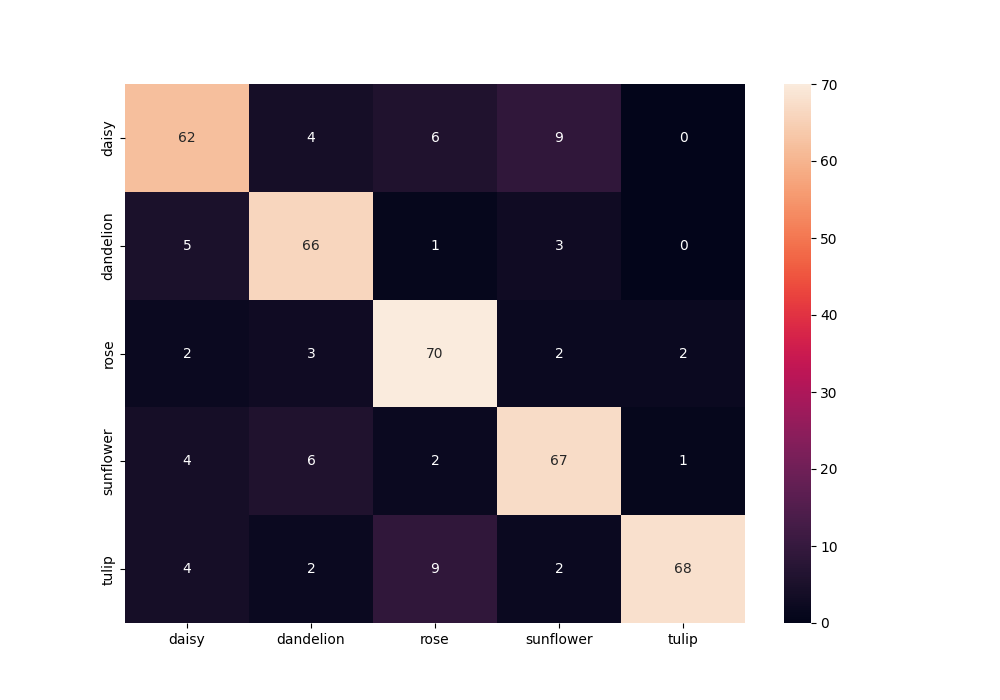

Q-Learning:
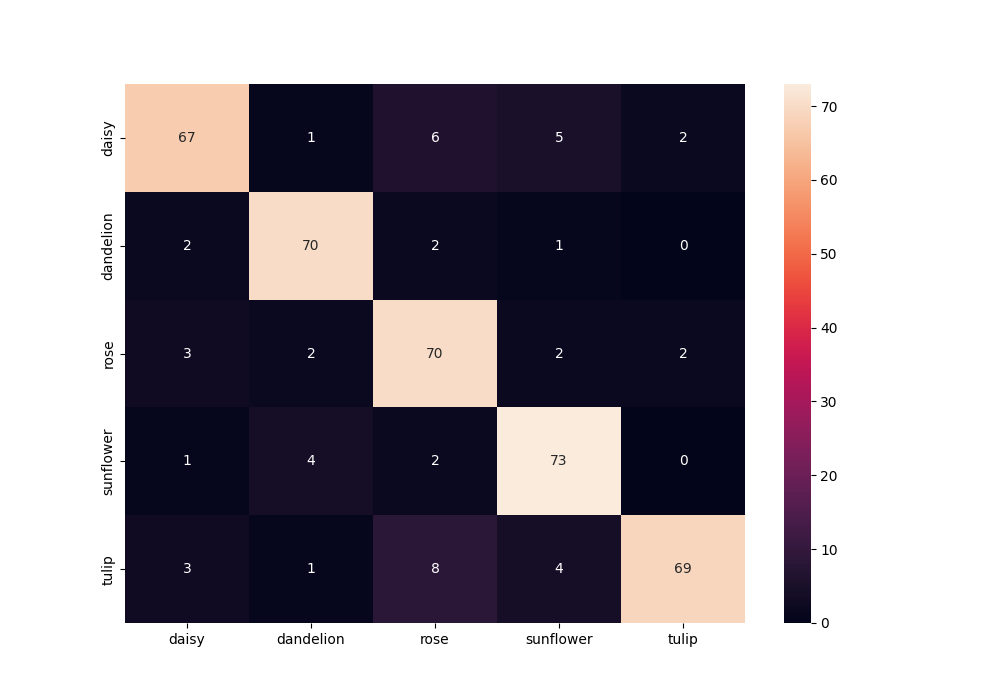

Monte Carlo:
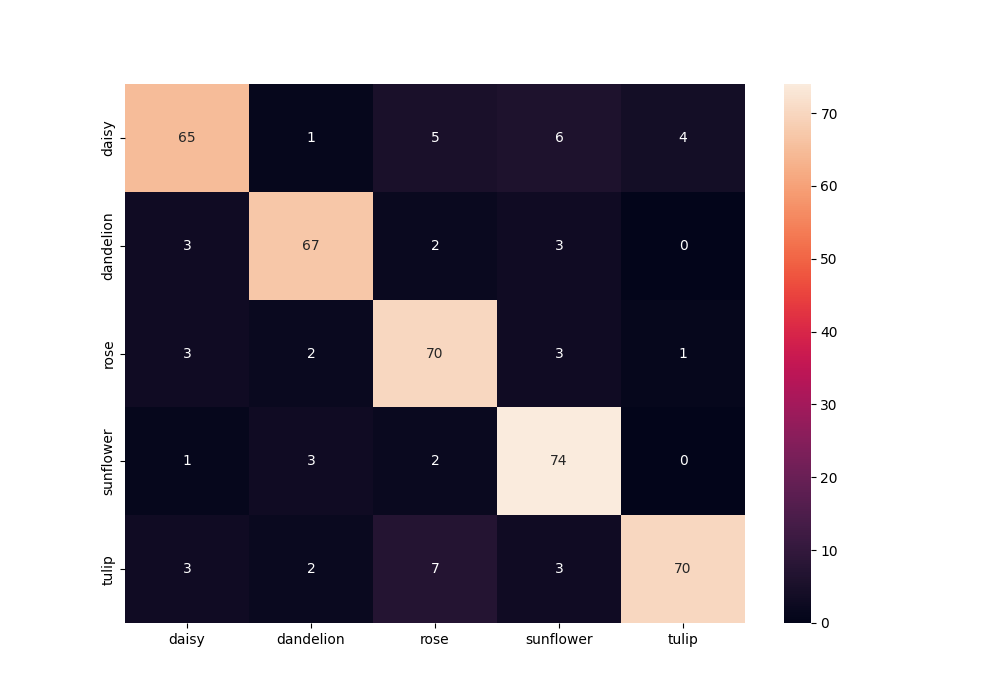

DQN:
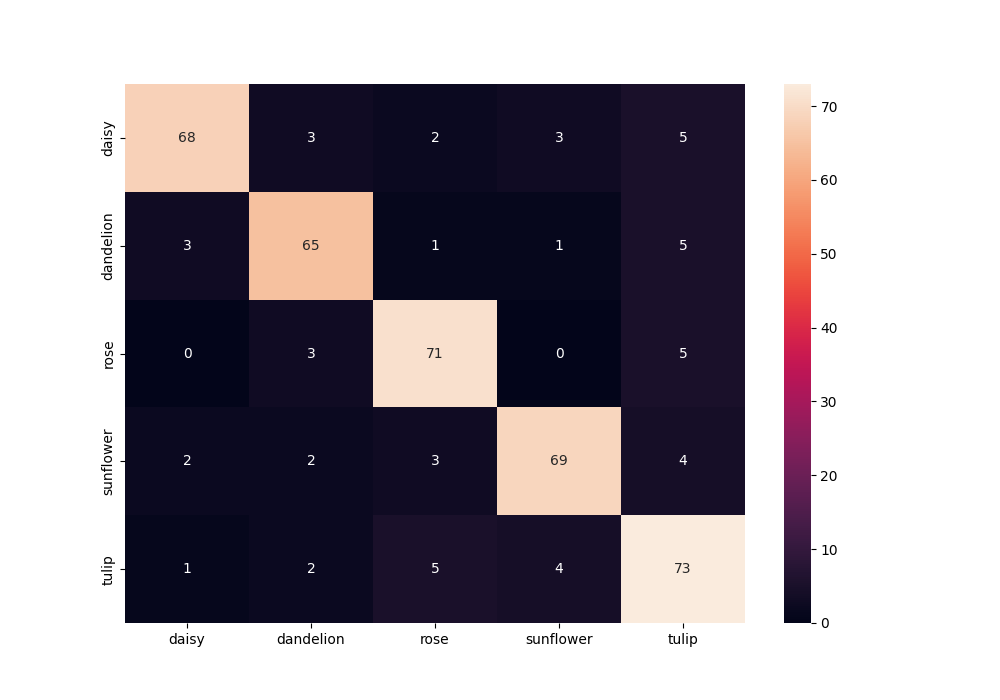

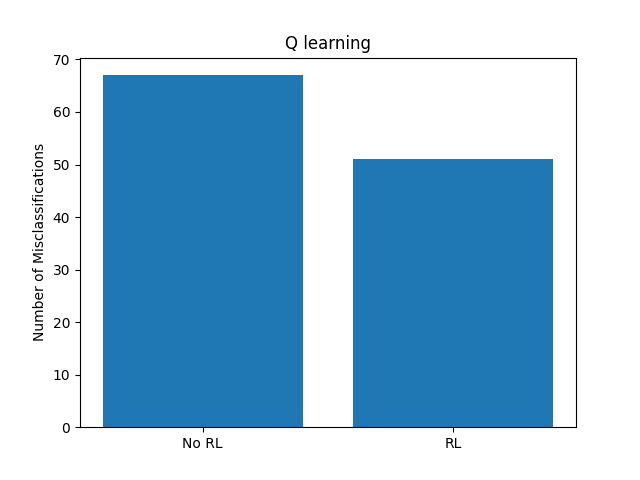

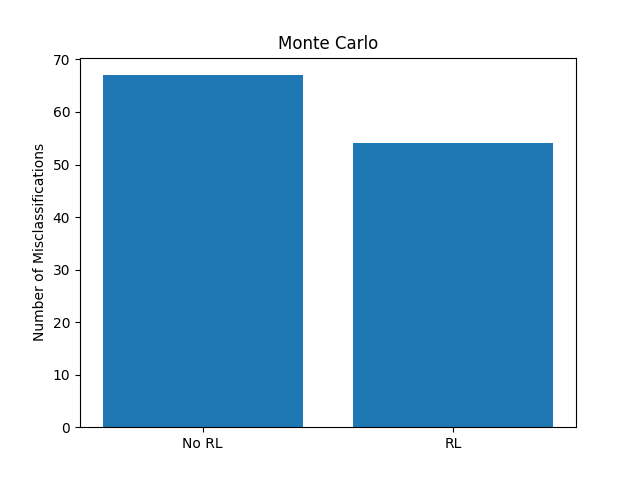

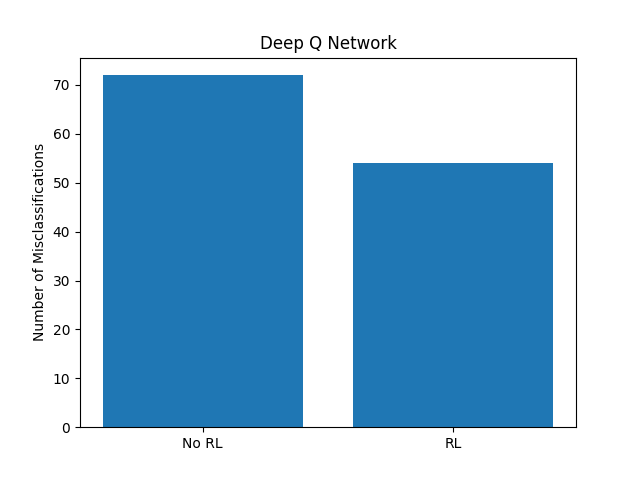

#### Remote Sensing Dataset ResNet Results


|  | No RL | Q-Learning | Monte Carlo | DQN |
| --- | --- | --- | --- | --- |
| **Accuracy** | .9325 | .94 | .9425 | .9437 |
| **Precision** | .93 | .94 | .94 | .95 |
| **Recall** | .93 | .94 | .94 | .94 |
| **Training Time** | 231 | 651 | 2759 | 689 |

No RL:
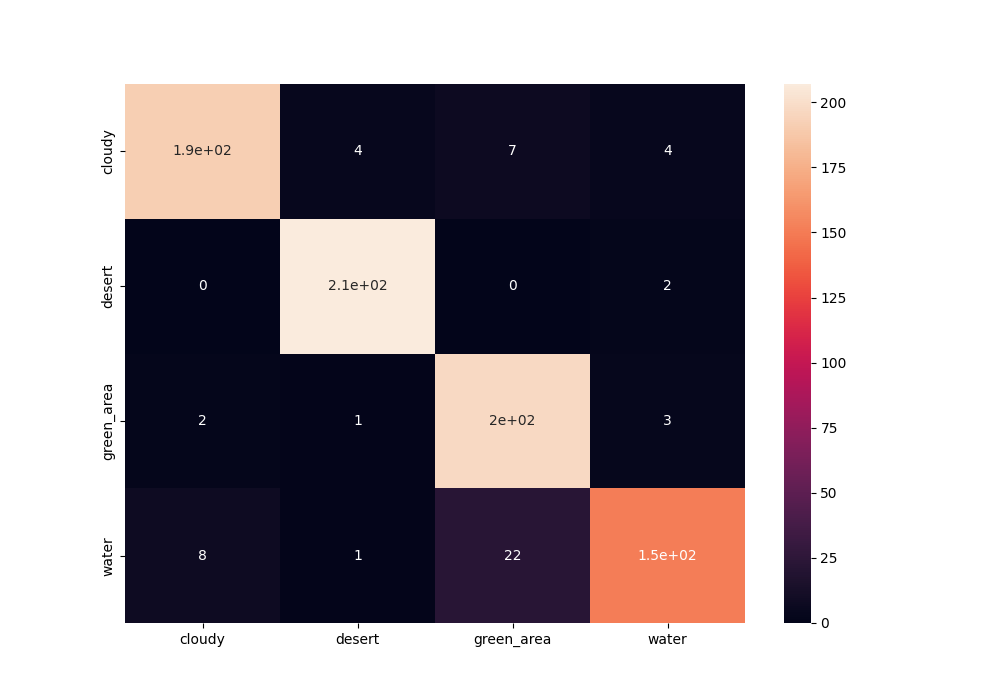

Q-Learning:
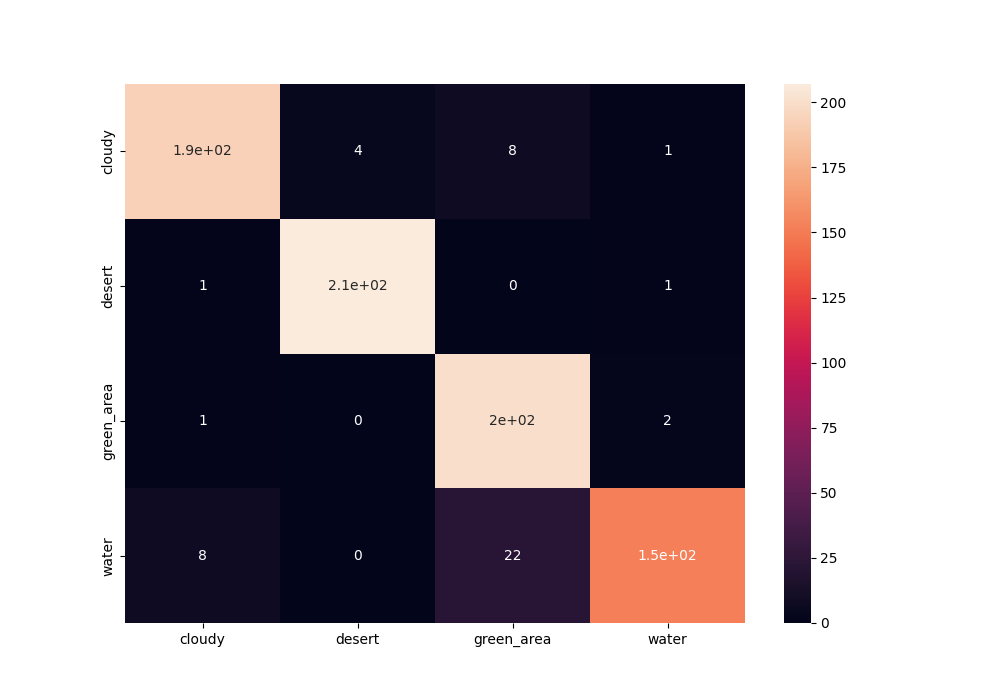

Monte Carlo:
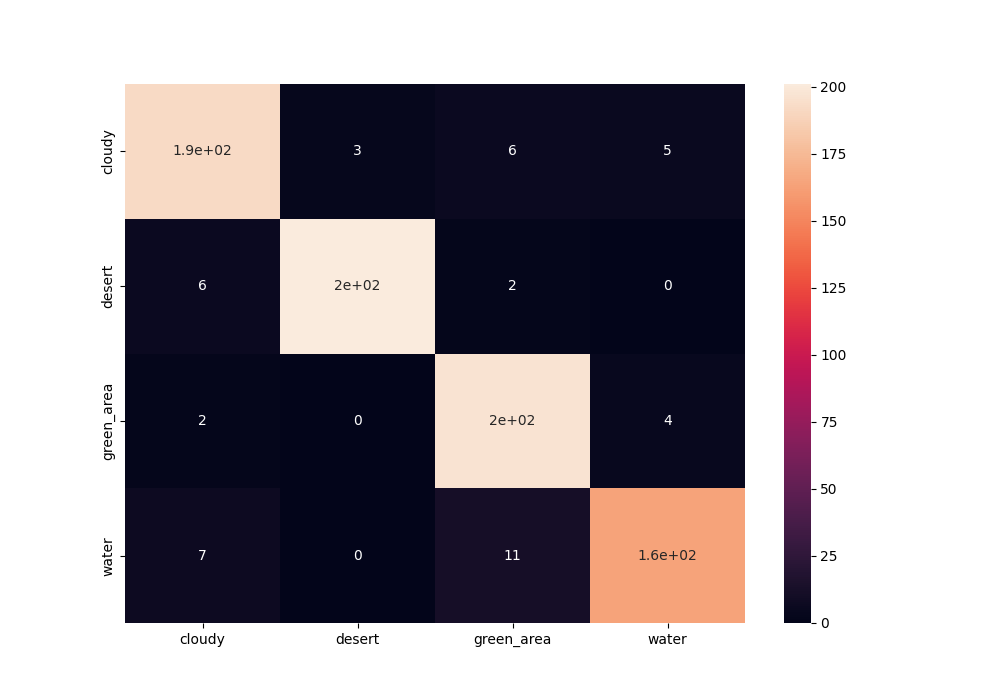

DQN:
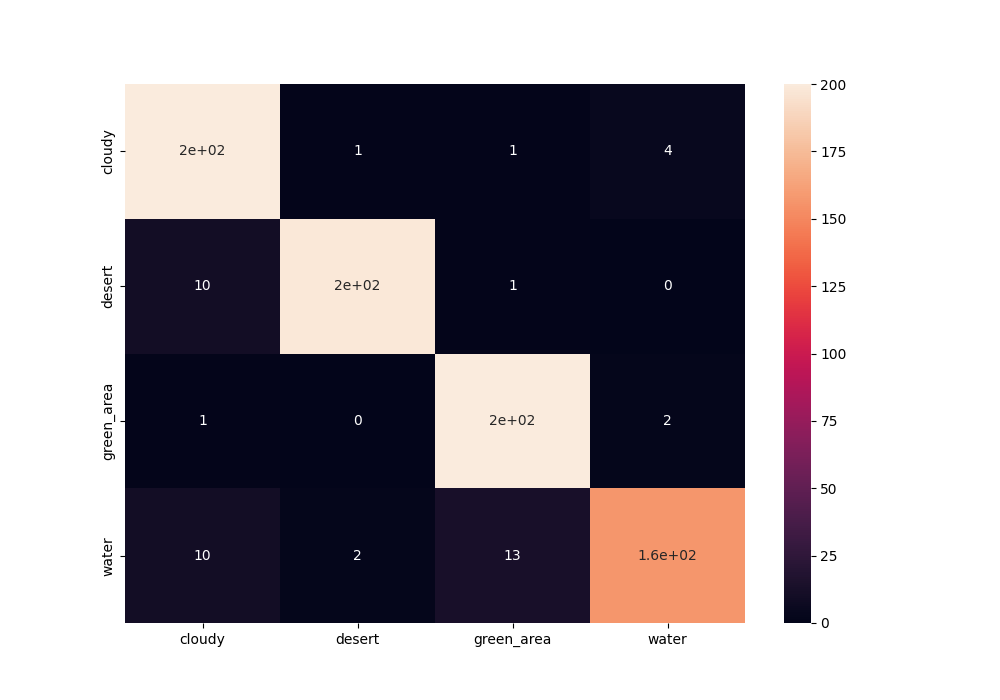

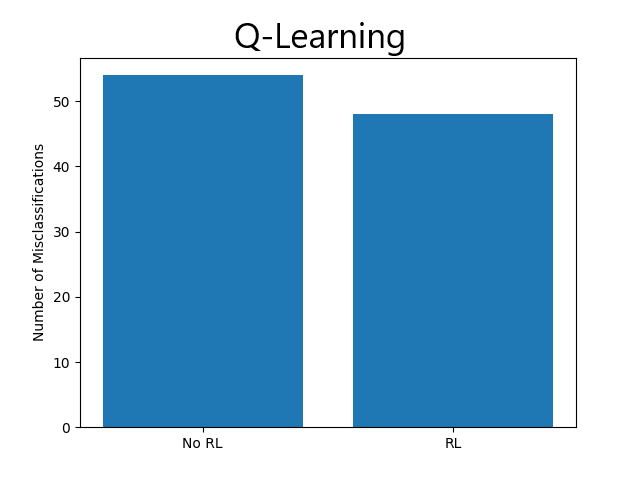

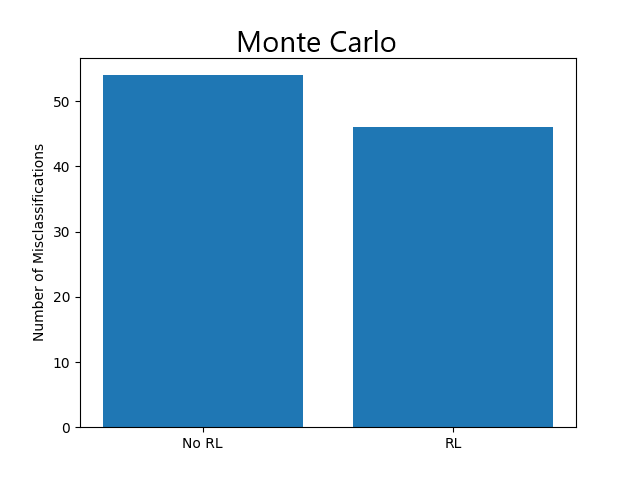

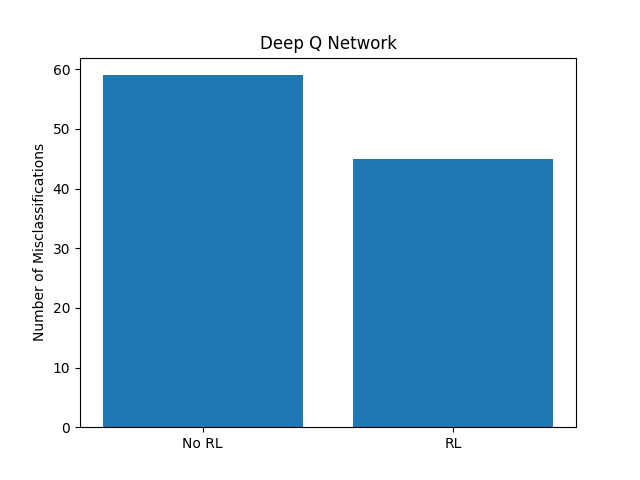

#### Remote Sensing Dataset NASNetMobile Results

|  | No RL | Q-Learning |
| --- | --- | --- |
| **Accuracy** | .8362 | .8825 |
| **Precision** | .84 | .89|
| **Recall** | .84 | .88 |
| **Training Time** | 44 | 151 |

No RL:
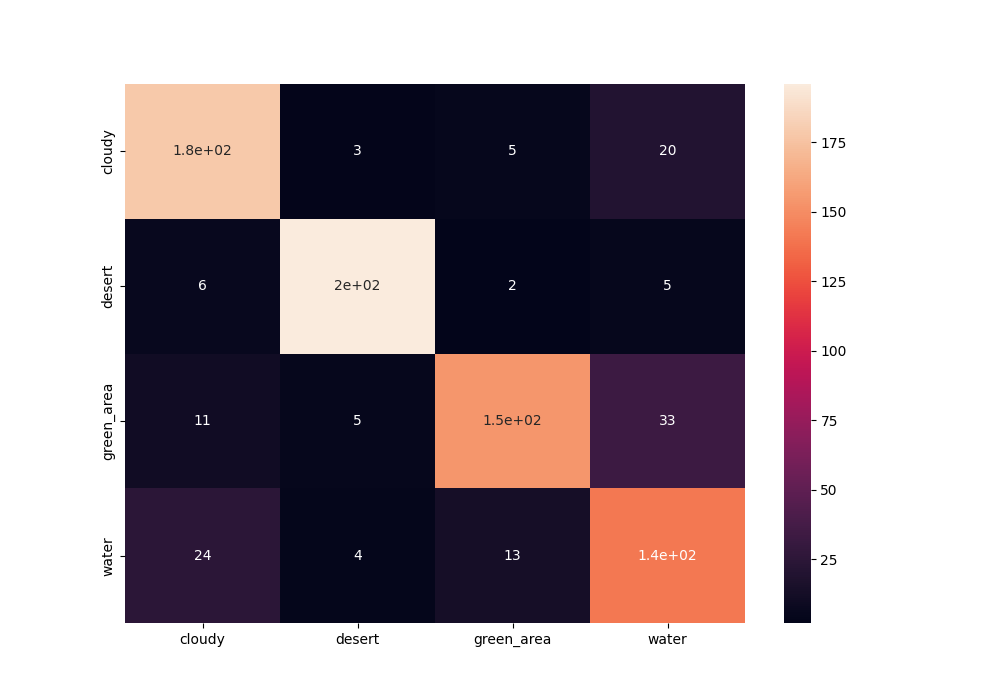

Q-Learning:
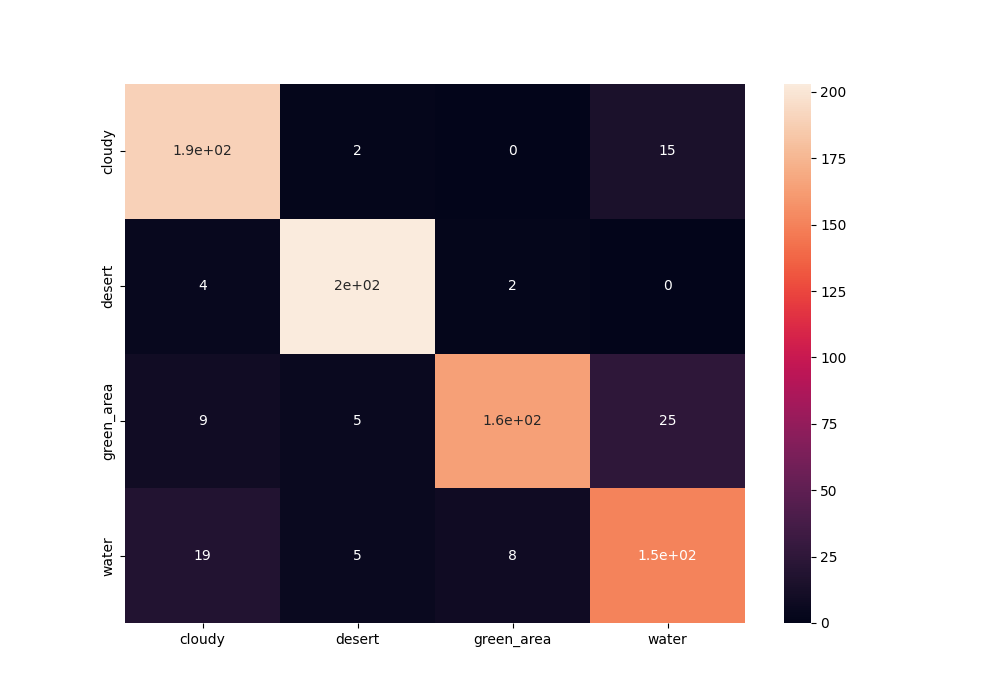

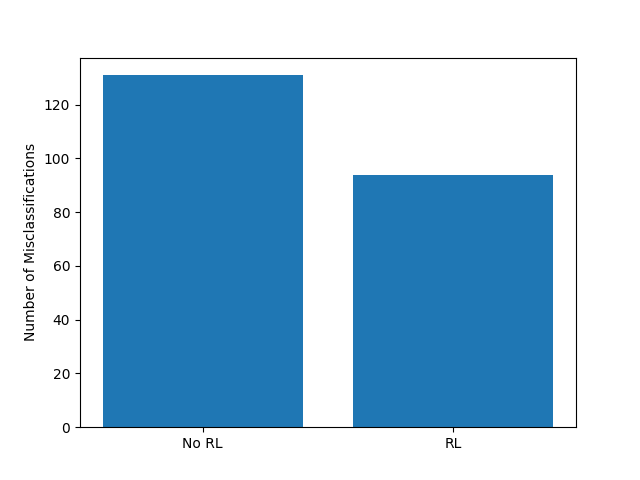

#### Pedestrian Detection Dataset Results

|  | No RL | Q-Learning | Monte Carlo | DQN |
| --- | --- | --- | --- | --- |
| **Accuracy** | .9168 | .9346 | .9485 | .9425 |
| **Precision** | .92 | .94| .95 | .94 |
| **Recall** | .92 | .93 | .95 | .94 |
| **Training Time** | 133 | 390 | 2809 | 382 |

No RL:
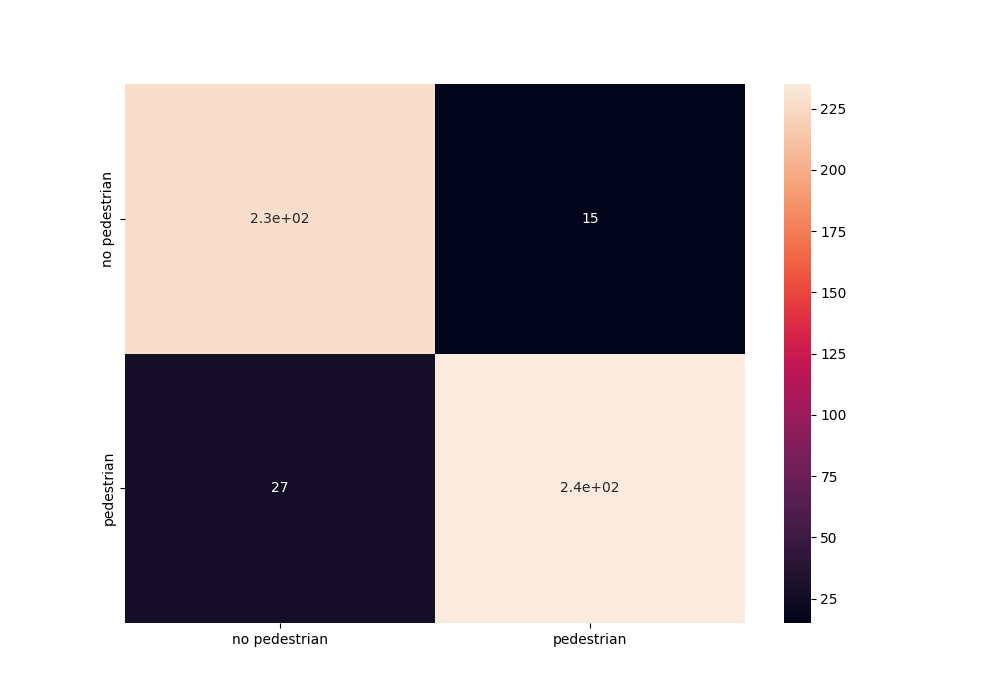

Q-Learning:
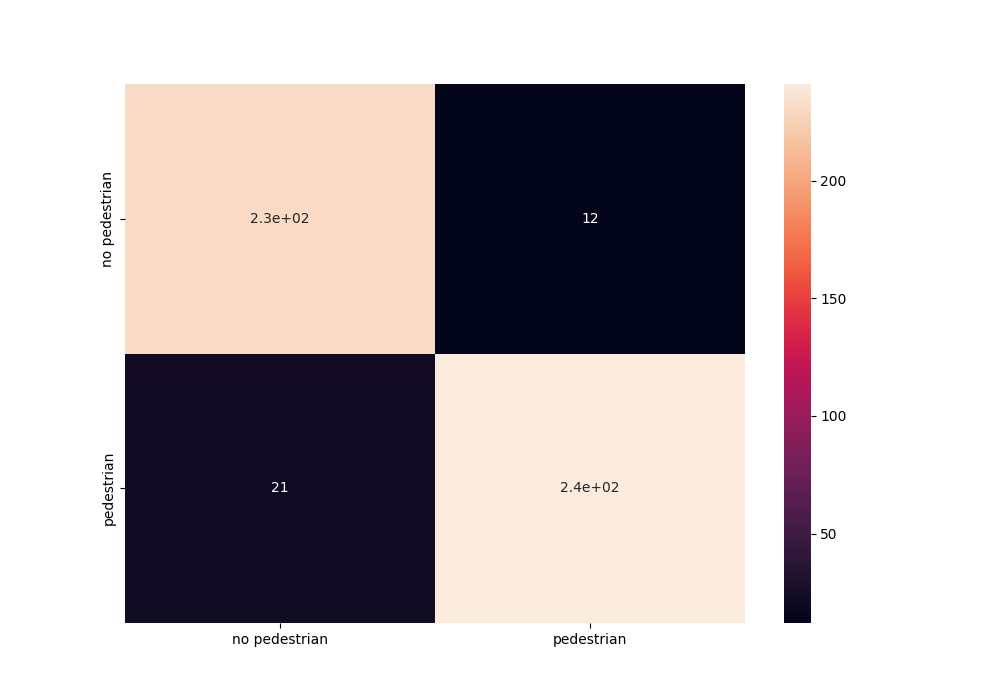

Monte Carlo:
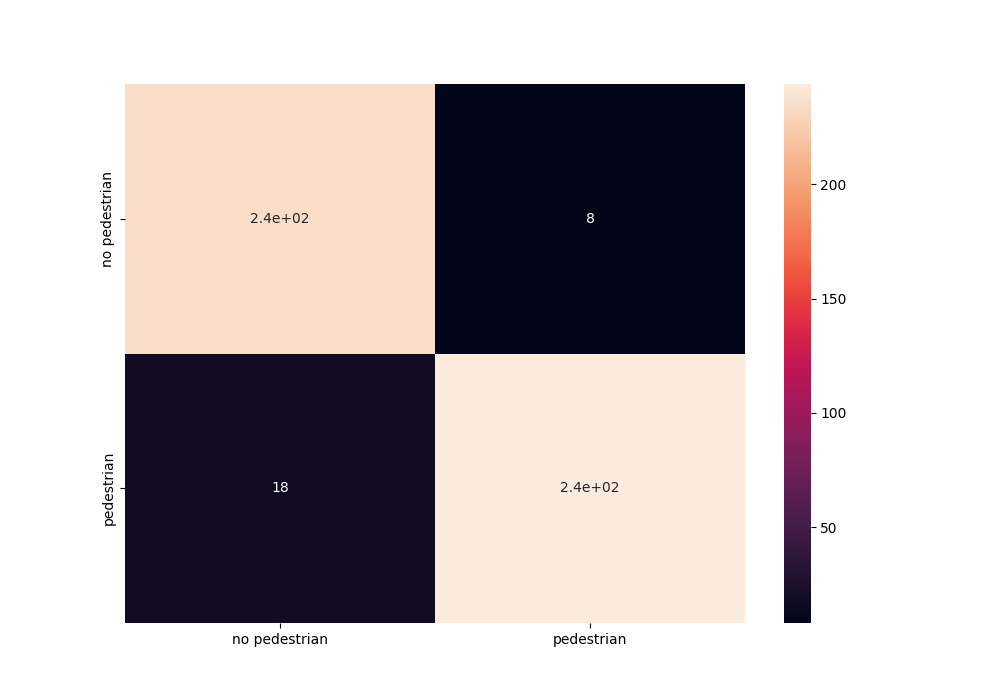

DQN:
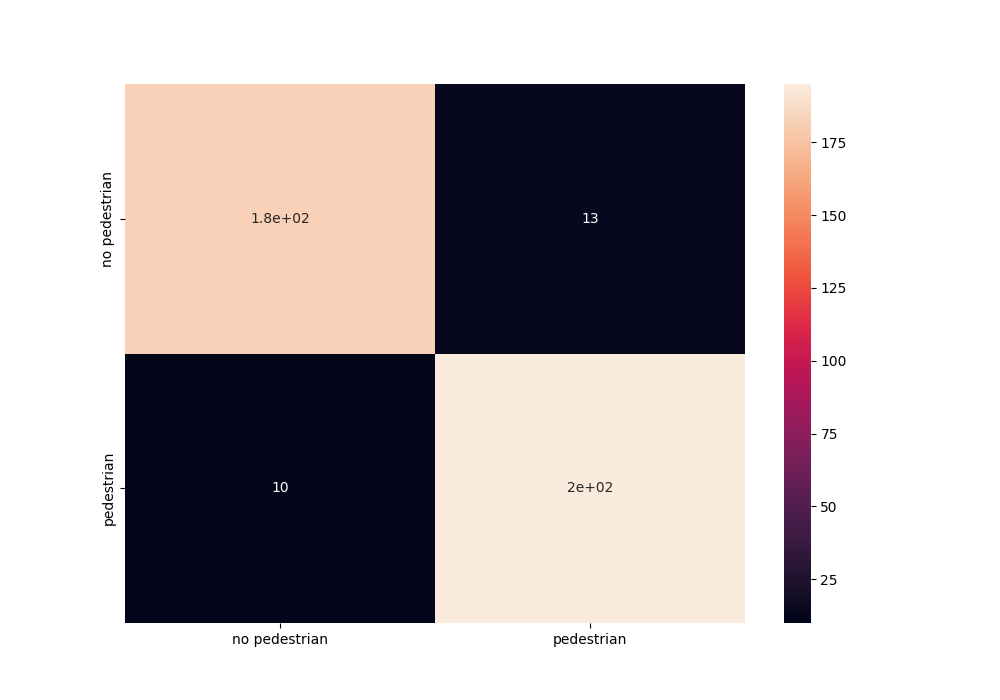

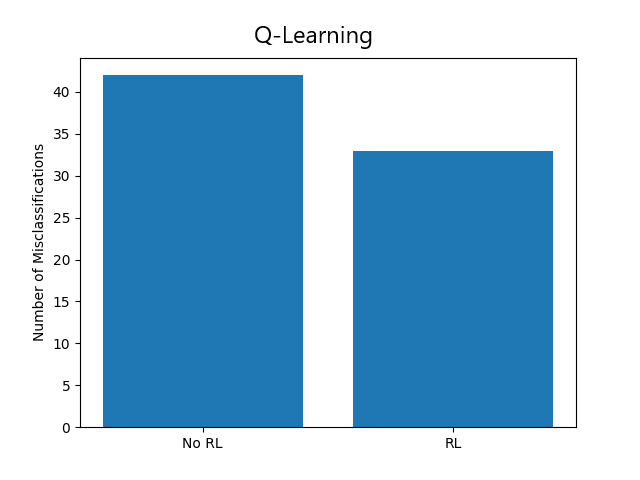

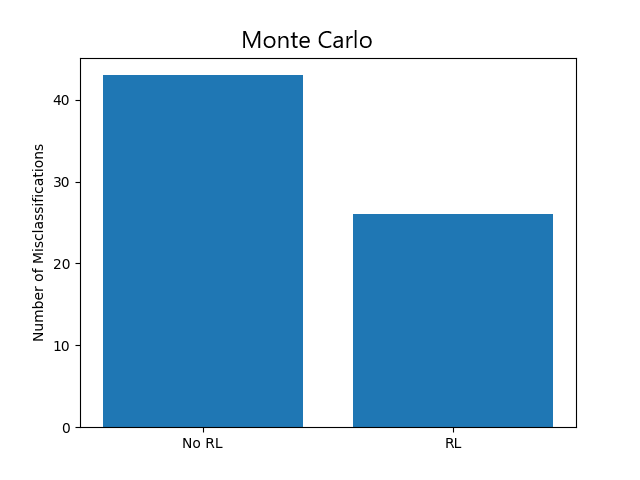

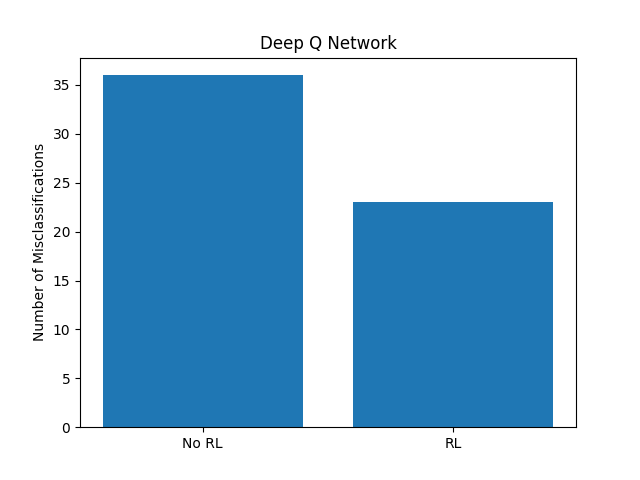

#### CIFAR-10 Dataset Results

|  | No RL | Q-Learning | Monte Carlo |
| --- | --- | --- | --- |
| **Accuracy** | .7335 | .788 | .7975 |
| **Precision** | .75 | .80| .81 |
| **Recall** | .73 | .79 | .81 |
| **Training Time** | 402 | 1417 | 13366 |

No RL:
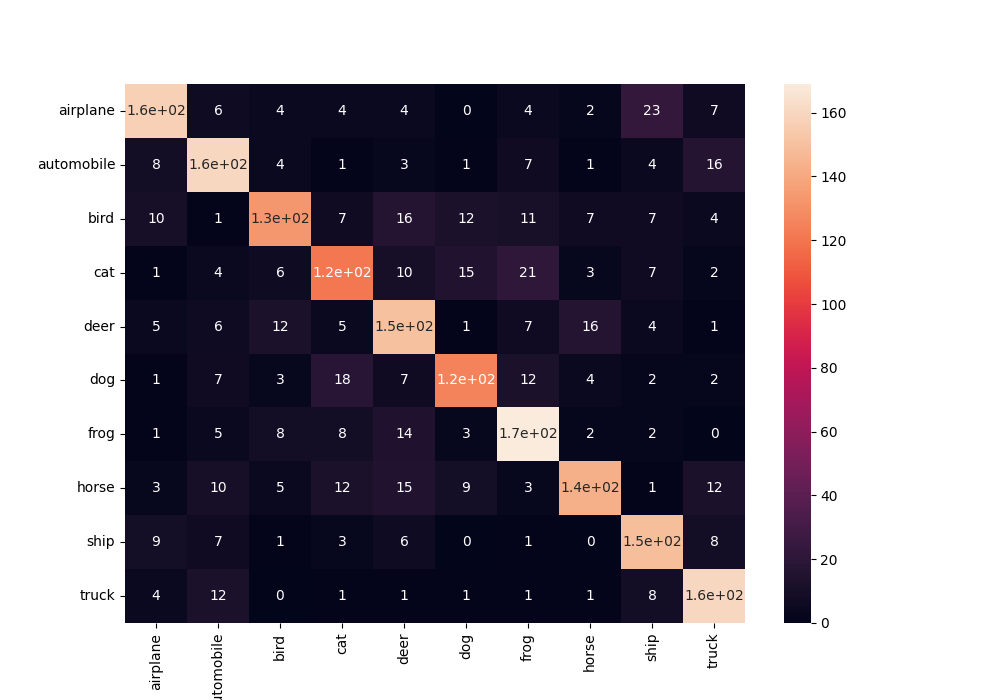

Q-Learning:
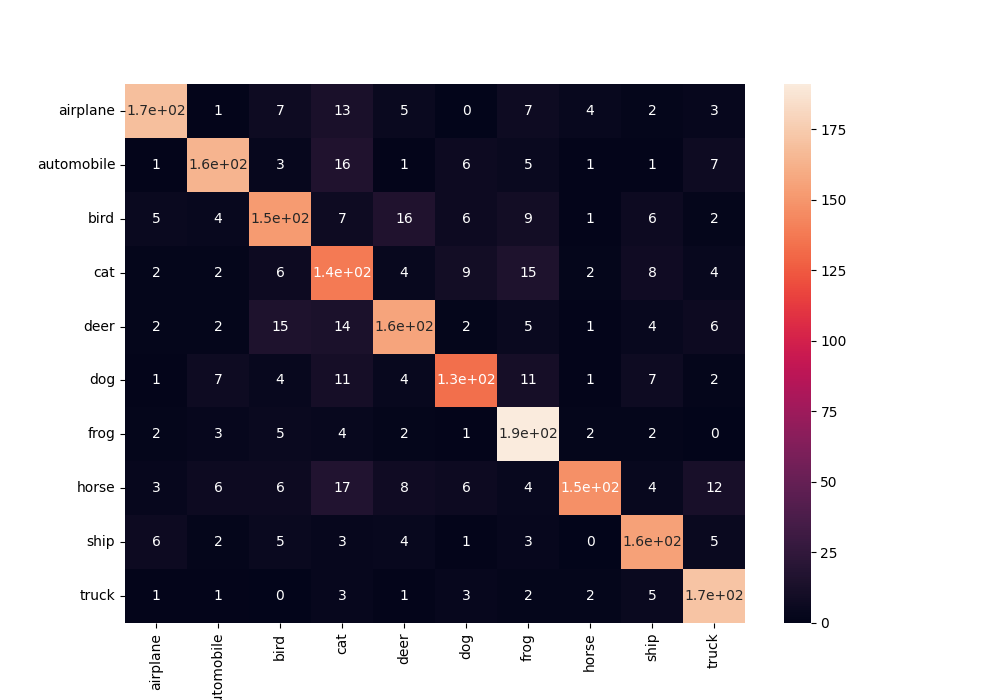

Monte Carlo:
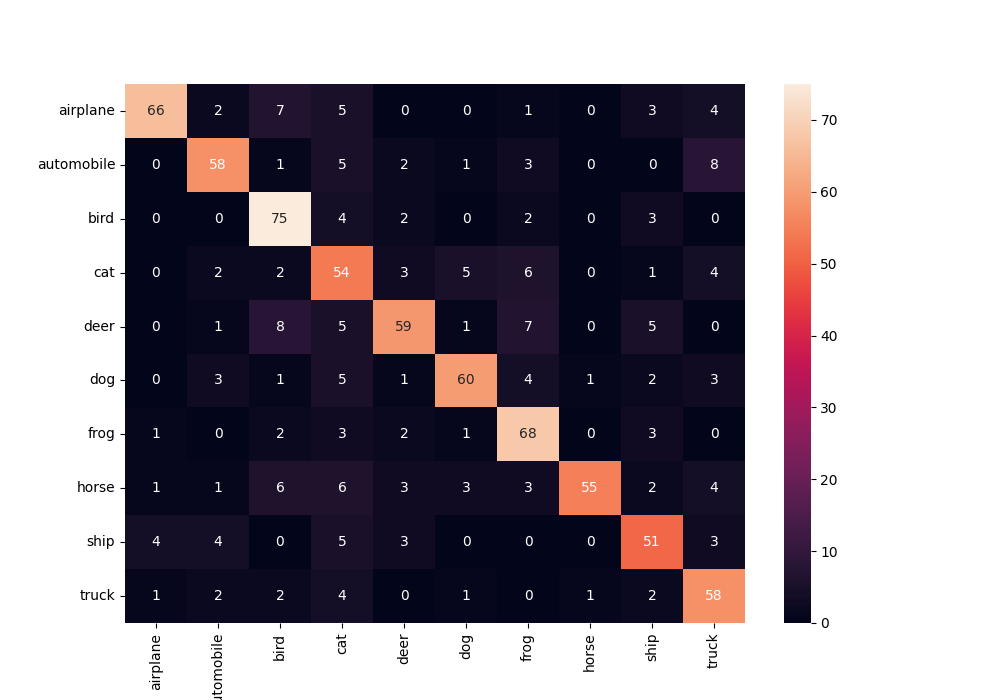

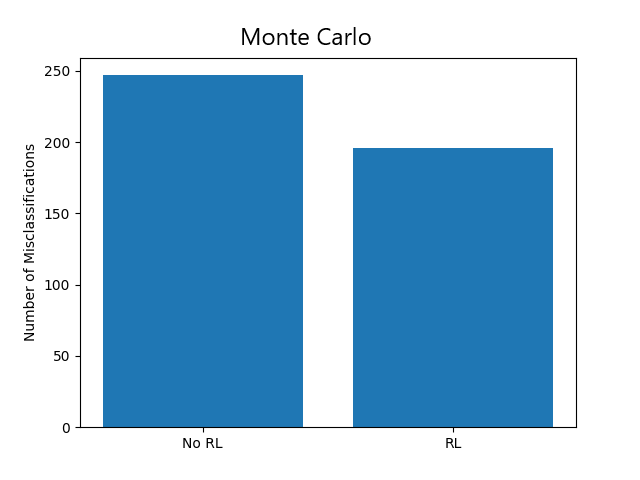

## Discussion

The results indicate that the Reinforcement Learning algorithms lead to an increase in classification performance across the board. However, this performance increase comes at a cost to computational efficiency. We find that even the fastest RL algorithm will often more than double the training time required. In addition, the accuracy improvements are not always clear.

When the classification accuracy is generally high, the improvement is extremely small. For the remote sensing dataset using ResNet, where the CNN by itself already achieves about 93% accuracy, the RL algorithms improve performance by only about 1%. However, for the same dataset using NASNetMobile, where the overall classification accuracy is lower, applying RL leads to a more substantial performance uplift of 5%. We also observe a 5-6% accuracy advantage for the RL implementations on the CIFAR-10 dataset, where the no-RL model achieves just 73% accuracy. For both the pedestrian detection and flower recognition datasets, where the overall accuracies fall between those of the previously discussed datasets,  the RL algorithms lead to a performance increase of about 3-4%---an expected result.

We find that Monte Carlo is generally the most performant RL implementation by a small margin, but is also by far the most expensive. For all datasets tested, it's at least 10 times more costly than the no-RL pipeline. For CIFAR-10, the largest dataset we tested, the MC algorithm requires 33x more computation time compared to no-RL, while netting a performance gain of only 6%. Its execution time is also 10x higher than that of Q-Learning. However, for the lighter datasets such as remote sensing, MC's efficiency deficit is less apparent: no-RL is "only" 10x faster, while Q-Learning is 4x faster. MC's efficiency across these datasets reflect nonlinear time complexity in terms of the time of the other algorithms: as the dataset size increases, MC becomes less feasible.

On the other hand, we observe that Q-learning is quite efficient, especially when compared to MC; the slightly lower performance is often more than justified by the computational savings. However, Q-learning is still generally 3-4x more costly than no-RL. For smaller datasets this efficiency difference is less apparent and in some cases, such as when the overall accuracy is low, it can be justified by the increased accuracy. But for larger datasets where the time discrepancy becomes significant, no-RL likely remains the superior option.

The story is similar for Deep Q Network. Performance wise, this algorithm is typically slightly better than Q-Learning and trades blows with Monte Carlo. When it comes to efficiency, DQN matches Q-learning across all datasets tested. Based on these results, DQN appears to be the best RL algorithm for this task when taking performance and efficiency into account. 

At the start of the project, we had expected DQN to have the best performance as it uses a neural network to learn the Q values in addition to the update rule. We also expected Monte Carlo to have the worst performance as it's generally meant for episodic rather than continuous tasks like image classification. To our surprise, Monte Carlo ended up performing the best in accuracy, despite our usage of abstract formulations of episodes and steps in its implementation. When it comes to efficiency, it was obvious that the no-RL configuration would run the fastest. However, we had expected the DQN to be the slowest as it's the most complex and even requires training a NN; in fact, we weren't entirely wrong. Indeed, our first implementation of the DQN algorithm was 10x(!) slower than Monte Carlo, and actually resulted in *worse* performance than the other 2 RL methods. We found that training the NN over the same number of steps as the Q-learning algorithm was far too many, and as a result it suffered from overfitting. When we drastically reduced the amount of training of the DQN, we found that it achieved a similar level of performance to MC while maintaining a run time similar to that of Q-learning.

We noticed a similiar issue with the CNN step of the pipeline. Specifically, it was extremely easy to overfit the model, which led to poor (and almost random) classification performance. Under these conditions, the RL algorithms did not help improve the performance. We employed standard ML techniques to address these issues, including reducing the number of epochs and the learning rate, applying appropriate image preprocessing, choosing an appropriate batch size, and expanding the amount of data used.

We were also surprised by the performance gains netted by the RL algorithms. Going into the project, we had expected performance increases in the range of 1-2%; however, our results show that in many cases, the gain can be 5-6%. These numbers are significant and we believe require further investigation.

## Future Work

Despite the apparent success of the Two-State RL technique studied, we believe much remains to be investigated. One major criticism we have of the technique is the definition of the states. Specifically, based on the proposed implementation, we believe it would be difficult to determine the state of a given image in a real world setting. This issue arises because in order to assign a state to an image, we would first need to apply an action. However, there's no way to know which action to take better than random chance. To address this issue, we suggest a state encoding scheme based on the confidence score of the predictions of the CNN. Specifically, define a threshold below which images are considered "hard to classify", and multiple intervals below it such that each one corresponds to a different state. The idea is that different types of images have different optimal actions. It is not possible to group the images by these types directly, but we hypothesis a grouping based on confidence score would result in boundaries that roughly correspond to those of optimal actions. Once these states are defined, update their corresponding Q values following the same technique as that stated by the author. Other state encodings may be possible; further inspection of this topic should be done to determine the most optimal state definitions.

Another criticism we have is that the technique in question is quite costly when it comes to efficiency. The author claims the opposite, but our results indicate that such is not the case, especially for large datasets. We also suspect that the increased accuracy resulted from the RL algorithms may simply be offset by additional training with the CNN or by expanding the size of the training data, which may actually be faster. However, these tradeoffs should be further studied before any concrete conclusions may be drawn.

The actions used in this technique is another area that requires further study. The author seems to have arbitrarily chosen rotations and translations, but there's no apparent reason why these would be better than other types of image transformations. Thus, more testing should be conducted to observe the results of populating the action space with a wider selection and range of actions.

The final major area we think future work should explore is the RL algorithms themselves. In the interest of time, we were only able to test 3 algorithms. However, there are other algorithms that might be more effective for this task. We found that the RL algorithms we used were a significant efficiency bottleneck. As a next step, we suggest looking into ways to improve the efficiency of these algorithms without compromising their performance. Furthermore, more work can be done in the selection of algorithm parameters. In our case, we simply chose the values used by the author, but it is not necessarily the case that they are optimal.

## Conclusion

Our testing of the Two-State image classification technique uncovered intriguing results. Using Q-learning, Monte Carlo, and Deep Q Network, we found in some cases significant increases to accuracy, while in other cases there was almost no performance benefit. We also observed that in all cases, the RL algorithms come at a cost to computational speed, some much more than others. We found that for small datasets and lower performing CNNs, the RL step can be beneficial. However, their tradeoffs become increasingly difficult to justify as the dataset size and CNN performance increase.

Despite the author's bold claims, our testing indicates that the benefits of the technique are not always so clear cut, and many questions surrounding it require further investigation. For now, we believe its applicability in the real world remains unrealistic.

## Appendix

[Code](https://github.com/permaspike/reinforcement-learning-project/tree/main)

[Video](https://www.youtube.com/watch?v=7_zL1Bd7NZ8)